## Imports

In [224]:
# Utils
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Spliter.
from sklearn.model_selection import train_test_split

In [225]:
# Global variables
cutsAmount = 5

## Read the data for the first time

In [226]:
ecommerceDataset = pd.read_csv("./ecommerce.csv")
ecommerceDataset.drop('ID', axis=1, inplace=True)
ecommerceDataset.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


Product has NOT reached on time    : 0.596691
Product has reached on time       : 0.403309


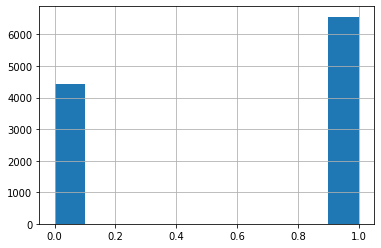

In [227]:
Y = ecommerceDataset['Reached.on.Time_Y.N'].value_counts()
print('Product has NOT reached on time    : {0:f}'.format(Y[1]/len(ecommerceDataset)))
print('Product has reached on time       : {0:f}'.format(Y[0]/len(ecommerceDataset)))
ecommerceDataset['Reached.on.Time_Y.N'].hist()
plt.show()

In [228]:
ecommerceDataset['Warehouse_block'].value_counts()
ecommerceDataset['Mode_of_Shipment'].value_counts()
ecommerceDataset['Product_importance'].value_counts()
ecommerceDataset['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [229]:
wareHouse = ecommerceDataset['Warehouse_block'].value_counts()
diccWareHouse = {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'F' : 4}
diccShipment = {'Ship' : 0, 'Flight' : 1, 'Road' : 2}
diccImportance = {'low':0, 'medium':1, 'high':2}
diccGender = {'F' : 0, 'M' : 1}

newWareHouse = []
newShipment = []
newImportance = []
newGender = []
for i in range(len(ecommerceDataset)):
    newWareHouse.append(diccWareHouse[ecommerceDataset['Warehouse_block'][i]])
    newShipment.append(diccShipment[ecommerceDataset['Mode_of_Shipment'][i]])
    newImportance.append(diccImportance[ecommerceDataset['Product_importance'][i]])
    newGender.append(diccGender[ecommerceDataset['Gender'][i]])

ecommerceDataset.drop('Warehouse_block', axis=1, inplace=True)
ecommerceDataset['Warehouse_block'] = newWareHouse

ecommerceDataset.drop('Mode_of_Shipment', axis=1, inplace=True)
ecommerceDataset['Mode_of_Shipment'] = newShipment

ecommerceDataset.drop('Product_importance', axis=1, inplace=True)
ecommerceDataset['Product_importance'] = newImportance

ecommerceDataset.drop('Gender', axis=1, inplace=True)
ecommerceDataset['Gender'] = newGender


In [230]:
ecommerceDataset['classification'] = ecommerceDataset['Reached.on.Time_Y.N']
ecommerceDataset.drop('Reached.on.Time_Y.N', axis=1, inplace=True)

ecommerceDataset.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,classification
0,4,2,177,3,44,1233,3,1,0,0,1
1,4,5,216,2,59,3088,4,1,0,1,1
2,2,2,183,4,48,3374,0,1,0,1,1
3,3,3,176,4,10,1177,1,1,1,1,1
4,2,2,184,3,46,2484,2,1,1,0,1


## First experiment: normalize data
For the first experiment we are just going to normalize the data as feature engineering.

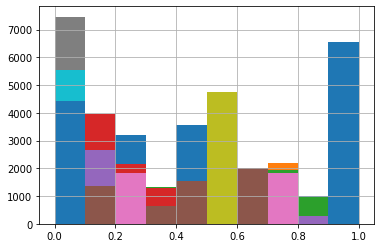

In [231]:
# Store the current labels to asign them later.
ecommerceDatasetLabels = ecommerceDataset['classification']

# Normalize the data using min max scaler.
ecommerceDatasetValues = ecommerceDataset.values
ecommerceDatasetNormalized = preprocessing.MinMaxScaler().fit_transform(ecommerceDataset)
# Create a new pandas dtta frame and reasing the 'classification' column, to prevent this for be normalized.
ecommerceDatasetNormalized = pd.DataFrame(ecommerceDatasetNormalized, columns=ecommerceDataset.columns)
ecommerceDatasetNormalized['classification'] = ecommerceDatasetLabels

for feature in ecommerceDatasetNormalized.columns:
    ecommerceDatasetNormalized[feature].hist()

## Second experiment: standardize data
For the first experiment we are just going to standardize the data as feature engineering.

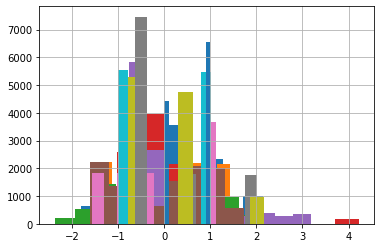

In [232]:
# Store the current labels to asign them later.
ecommerceDatasetLabels = ecommerceDataset['classification']

# Normalize the data using min max scaler.
ecommerceValues = ecommerceDataset.values
ecommerceDatasetStandardized = preprocessing.StandardScaler().fit_transform(ecommerceDatasetValues)
# Create a new pandas dtta frame and reasing the 'classification' column, to prevent this for be normalized.
ecommerceDatasetStandardized = pd.DataFrame(ecommerceDatasetStandardized, columns=ecommerceDataset.columns)
ecommerceDatasetStandardized['classification'] = ecommerceDatasetLabels

for feature in ecommerceDatasetStandardized.columns:
    ecommerceDatasetStandardized[feature].hist()

## Third experiment: better feature engineering
We are goin to use IQR for removing outliers in the datasets and check for missing values and duplicated
### Check missing values

In [233]:
ecommerceDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_care_calls  10999 non-null  int64
 1   Customer_rating      10999 non-null  int64
 2   Cost_of_the_Product  10999 non-null  int64
 3   Prior_purchases      10999 non-null  int64
 4   Discount_offered     10999 non-null  int64
 5   Weight_in_gms        10999 non-null  int64
 6   Warehouse_block      10999 non-null  int64
 7   Mode_of_Shipment     10999 non-null  int64
 8   Product_importance   10999 non-null  int64
 9   Gender               10999 non-null  int64
 10  classification       10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


Check for duplicated

In [234]:
ecommerceDataset.duplicated().sum()

0

Delete standard deviation columns. We are going to classify according to the mean values. 

In [235]:
dataSetBetterFE = ecommerceDataset.copy()

## Delete outliers with IQR technique

In [236]:

# Describe the quantils for each features
print(dataSetBetterFE.columns)
dataSetBetterFE.head()

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender',
       'classification'],
      dtype='object')


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,classification
0,4,2,177,3,44,1233,3,1,0,0,1
1,4,5,216,2,59,3088,4,1,0,1,1
2,2,2,183,4,48,3374,0,1,0,1,1
3,3,3,176,4,10,1177,1,1,1,1,1
4,2,2,184,3,46,2484,2,1,1,0,1


In [237]:
dataSetBetterFE.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,classification
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,2.333394,0.481589,0.604600,0.495863,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,1.490726,0.754813,0.641464,0.500006,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,3.000000,0.000000,1.000000,0.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,4.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,4.000000,2.000000,2.000000,1.000000,1.000000


In [238]:
def calculateBoundsWithIQR(datacolumn):
    Q1 = datacolumn.quantile(0.25)
    Q3 = datacolumn.quantile(0.75)

    IQR = Q3-Q1

    lowerRange = Q1 - (1.5 * IQR)
    higherRange = Q3 + (1.5 * IQR)

    return lowerRange, higherRange

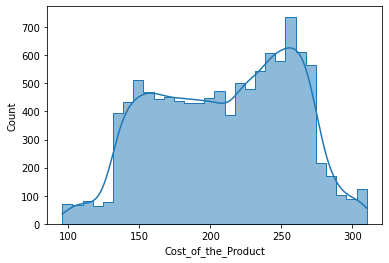

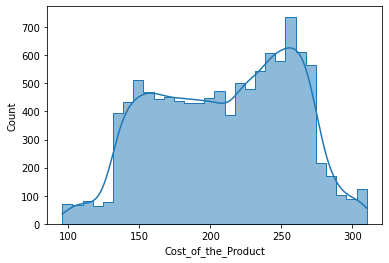

In [239]:
sns.histplot(dataSetBetterFE['Cost_of_the_Product'], kde=True, element='step')
plt.show()

lower, higher = calculateBoundsWithIQR(dataSetBetterFE['Cost_of_the_Product'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['Cost_of_the_Product'] > lower) & (dataSetBetterFE['Cost_of_the_Product'] < higher)]
sns.histplot(dataSetBetterFE['Cost_of_the_Product'], kde=True, element='step')
plt.show()

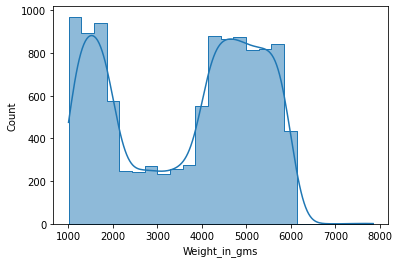

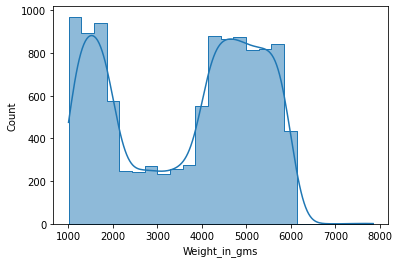

In [240]:
sns.histplot(dataSetBetterFE['Weight_in_gms'], kde=True, element='step')
plt.show()

lower, higher = calculateBoundsWithIQR(dataSetBetterFE['Weight_in_gms'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['Weight_in_gms'] > lower) & (dataSetBetterFE['Weight_in_gms'] < higher)]
sns.histplot(dataSetBetterFE['Weight_in_gms'], kde=True, element='step')
plt.show()

In [241]:

dataSetBetterFE.shape

(10999, 11)

In [242]:
# Get the columns needed to calculate the vif
variables = dataSetBetterFE[[
       'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']]
constants = add_constant(variables)

# Calculate the vif and store the values in a pandas data frame to display it.
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(constants.values, i) for i in range (constants.shape[1])]
vif['features'] = constants.columns
vif

,VIF,features
0,63.792324,const
1,1.260272,Customer_care_calls
2,1.000436,Customer_rating
3,1.144155,Cost_of_the_Product
4,1.074208,Prior_purchases
5,1.300061,Discount_offered
6,1.398429,Weight_in_gms
7,1.000795,Warehouse_block
8,1.000317,Mode_of_Shipment
9,1.017325,Product_importance


(10999, 11)
Product has NOT reached on time       : 0.596691
Product has reached on time           : 0.403309


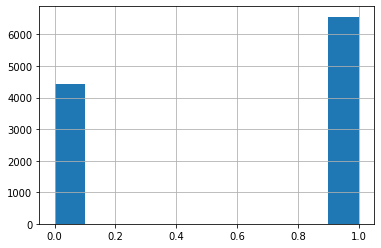

In [243]:
classification = dataSetBetterFE['classification'].value_counts()
print(dataSetBetterFE.shape)
print('Product has NOT reached on time       : {0:f}'.format(classification[1]/len(dataSetBetterFE)))
print('Product has reached on time           : {0:f}'.format(classification[0]/len(dataSetBetterFE)))
dataSetBetterFE['classification'].hist()
plt.show()

### Standardize the data

In [244]:
dataSetBetterFELabels = dataSetBetterFE['classification'].values

# Standardize the data using standar scaler.
dataSetBetterFEValues = dataSetBetterFE.values
dataSetBetterFEStandardized = preprocessing.StandardScaler().fit_transform(dataSetBetterFEValues)

# Create a new pandas data frame and reasing the 'classification' column, to prevent this for be standardized.
dataSetBetterFE = pd.DataFrame(dataSetBetterFEStandardized, columns=dataSetBetterFE.columns)
dataSetBetterFE['classification'] = dataSetBetterFELabels

In [245]:
def detailProportion(yTrain, yTest):

    print("Training set distribution")
    classification_X_train = yTrain.values

    print('Product has NOT reached on time    : {0:f}%'.format(np.count_nonzero(classification_X_train == 1)  / len(yTrain)))
    print('Product has reached on time       : {0:f}%'.format(np.count_nonzero(classification_X_train == 0)  / len(yTrain)))
    print('Training set size ', len(yTrain))
    print('Training set rate {0:f}%'.format(len(yTrain)/(len(yTrain)+len(yTest))))

    print('---------------------')
    print("Test set distribution")
    classification_X_test = yTest.values
    print('Product has NOT reached on time   : {0:f}%'.format(np.count_nonzero(classification_X_test == 1) / len(yTest)))
    print('Product has reached on time       : {0:f}%'.format(np.count_nonzero(classification_X_test == 0) / len(yTest)))
    print('Test set size: ', len(yTest))
    print('Training set rate: {0:f}%'.format(len(yTest)/(len(yTrain)+len(yTest))))
    print()

In [246]:
def getDatasetCut(dataset, classColumnName):
    # Declare the target variable.
    y = dataset[classColumnName].values
    # Declare independent variables.
    x = dataset.drop([classColumnName], axis=1).values

    # Get the train and the test values.
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, train_size=0.8, stratify=y, shuffle=True)

    # Return the values.
    return xTrain, xTest, yTrain, yTest

def saveCSV(dataFrame, dir, filename):
    Path(os.path.join(os.getcwd(), dir)).mkdir(parents=True, exist_ok=True)

    dataFrame.to_csv(os.path.join(os.getcwd(), dir, filename), header=True,  index = False)
    #with open(os.path.join(os.getcwd(), dir, filename), 'a') as file:
        #file.write(dataFrame.to_csv())

def storeDatasetCut(dataset, classColumnName, dir, detail):
    # Get the cut.
    xTrain, xTest, yTrain, yTest = getDatasetCut(dataset, classColumnName)

    # Create a pandas data frame and store every partition.
    xTrain = pd.DataFrame(xTrain, columns=dataset.columns[:-1])
    xTest = pd.DataFrame(xTest, columns=dataset.columns[:-1])
    yTrain = pd.DataFrame(yTrain, columns=[dataset.columns[-1:]])
    yTest = pd.DataFrame(yTest, columns=[dataset.columns[-1:]])

    if detail:
        detailProportion(yTrain, yTest)

    # Save the coso in csv format.
    saveCSV(xTrain, dir, 'xTrain.csv')
    saveCSV(xTest, dir, 'xTest.csv')
    saveCSV(yTrain, dir, 'yTrain.csv')
    saveCSV(yTest, dir, 'yTest.csv')

# Crear cinco cortes para cada una de las pruebas.
for i in range(1, cutsAmount + 1):
    #print('Normalized\\cut{}\\'.format(i))
    storeDatasetCut(ecommerceDatasetNormalized, 'classification', 'eccomerce_Normalized\\cut{}\\'.format(i), i == 1)

for i in range(1, cutsAmount + 1):
    #print('Standardized\\cut{}\\'.format(i))
    storeDatasetCut(ecommerceDatasetStandardized, 'classification', 'eccomerce_Standardized\\cut{}\\'.format(i), i == 1)

for i in range(1, cutsAmount + 1):
    #print('BetterFE\\cut{}\\'.format(i))
    storeDatasetCut(dataSetBetterFE, 'classification', 'eccomerce_BetterFE\\cut{}\\'.format(i), i == 1)

Training set distribution
Product has NOT reached on time    : 0.596659%
Product has reached on time       : 0.403341%
Training set size  8799
Training set rate 0.799982%
---------------------
Test set distribution
Product has NOT reached on time   : 0.596818%
Product has reached on time       : 0.403182%
Test set size:  2200
Training set rate: 0.200018%

Training set distribution
Product has NOT reached on time    : 0.596659%
Product has reached on time       : 0.403341%
Training set size  8799
Training set rate 0.799982%
---------------------
Test set distribution
Product has NOT reached on time   : 0.596818%
Product has reached on time       : 0.403182%
Test set size:  2200
Training set rate: 0.200018%

Training set distribution
Product has NOT reached on time    : 0.596659%
Product has reached on time       : 0.403341%
Training set size  8799
Training set rate 0.799982%
---------------------
Test set distribution
Product has NOT reached on time   : 0.596818%
Product has reached on 